<a href="https://colab.research.google.com/github/prhvmm/Unsupervised-Learning-Algorithms-using-Python---K-Means-Hierarchal/blob/master/K_Means_and_Hierarchial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt 
import numpy as np
import random as random
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import load_breast_cancer
from scipy.linalg import eigh
from sklearn.decomposition import KernelPCA

#K Means

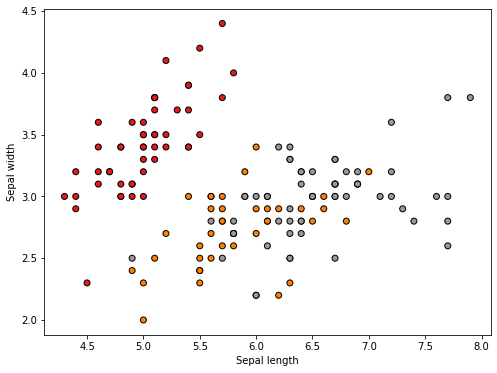

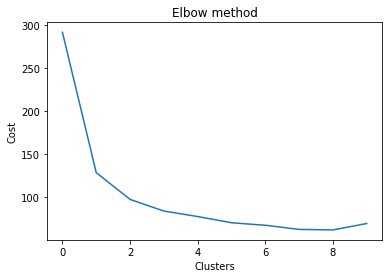

In [ ]:
from numpy.random.mtrand import shuffle
iris = datasets.load_iris()
X = iris.data
y = iris.target

## Plot the original dataset

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")


def get_means(centroids, clusters, k):
    for i in range(k):
        centroids[i] = np.mean(X[clusters == i], 0)



def show(X, clusters, centroids, k):
    plt.figure()
    plt.title('K Means++ with %i clusters' %k)
    plt.scatter(X[:, 0], X[:, 1], c=clusters) 
    plt.plot(centroids[:,0],centroids[:,1],'bo',markersize=15, color='orange')
    plt.draw()


def k_means(k):
    clusters = np.zeros((X.shape[0],1))
    centroids = np.zeros((k,X.shape[1]))
    centroids_indices = random.sample(range(X.shape[0]),k)

    counter = 0
    for i in centroids_indices:
        centroids[counter] = X[i,:]
        counter+=1

    dist = distance.cdist(X, centroids, 'euclidean')
    clusters = np.argmin(dist, axis=1)

    for i in range(100):
        get_means(centroids, clusters, k)
        dist = distance.cdist(X, centroids, 'euclidean')
        clusters = np.argmin(dist, axis=1)
        cost.append(np.sum(dist.min(axis=1)))
    
    return centroids, clusters

def show_cost(cost, xlabel, title):
    plt.figure()
    plt.plot(cost)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Cost")
    plt.show()


def kmeans_plusplus(k):
    clusters = np.zeros((X.shape[0],1))
    centroids = np.zeros((k,X.shape[1]))
    centroids_indices = random.sample(range(X.shape[0]),1)
    centroids[0] = X[centroids_indices,:]

    temp = np.copy(X)
    temp = np.delete(temp, centroids_indices, axis=0)

    for i in range(0,k-1):
        dist = distance.cdist(temp, centroids, 'euclidean')
        new_centroid = np.argmax(dist[:,i], axis=0)
        centroids[i+1] = temp[new_centroid,:]
        temp = np.delete(temp, new_centroid, axis=0)
        
    dist = distance.cdist(X, centroids, 'euclidean')
    clusters = np.argmin(dist, axis=1)
    for i in range(100):
        get_means(centroids, clusters, k)
        dist = distance.cdist(X, centroids, 'euclidean')
        clusters = np.argmin(dist, axis=1)
        cost.append(np.sum(dist.min(axis=1)))
    
    return centroids, clusters


k = 7
cost = list()
cost_cluster = list()

#centroids, clusters = k_means(k)  ## normal k means

#centroids, clusters = kmeans_plusplus(k)  ## kmeans++

## this for loop is for the elbow method

for cluster in range(10):
    centroids, clusters = k_means((cluster+1))
    cost_cluster.append(cost[-1])

show_cost(cost_cluster, 'Clusters', 'Elbow method')  ## ploting the cost curve based on the number of clusters (for the elbow method)


# show(X, clusters, centroids, k)  ## ploting the result clustering

# show_cost(cost, 'Iteration', 'K Means++ cost curve with %i clusters' %k)  ## ploting the cost curve based on the iterations

# print('The best cost is: %f' %cost[-1])





#Hierarchial

In [ ]:


linkages = {'ward', 'complete', 'average', 'single'}

def model_agglomerative(X, n_clusters):

    for methods in linkages:
        
        cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=methods, affinity='euclidean', compute_distances=True)
        pred = cluster.fit_predict(X)
        plt.figure()
        plt.title('Linkage: %s' %methods)
        plt.scatter(X[:, 0], X[:, 1], c=pred) 
        plt.show()

def model_DBSCAN(X, eps, min_samples):

    clustering = DBSCAN(eps=eps, min_samples=min_samples)
    pred = clustering.fit_predict(X)
    plt.figure()
    plt.title('DBSCAN')
    plt.scatter(X[:, 0], X[:, 1], c=pred) 

def plot_dendrogram(X):

    plt.figure()
    sch.dendrogram(sch.linkage(X, 'ward'))
    plt.show()    

def plot_original_data(X, y):
    plt.figure()
    plt.title('Original Data')


    plt.scatter(X[:, 0], X[:, 1], c=y) 

    plt.show()



##Circles

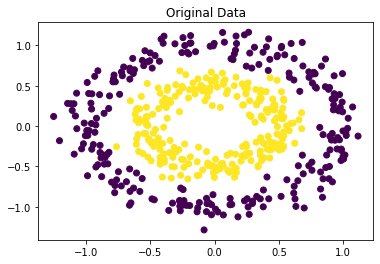

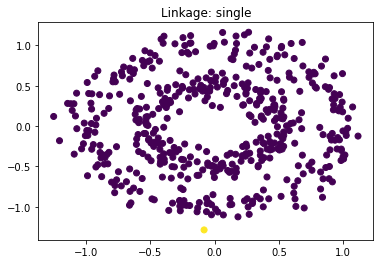

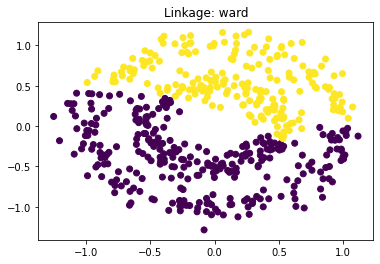

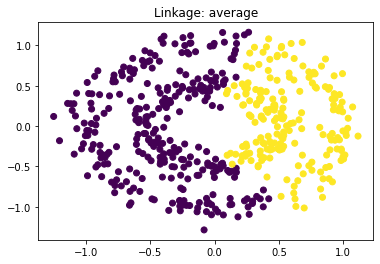

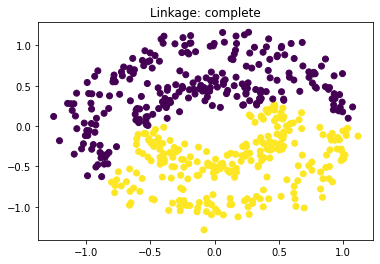

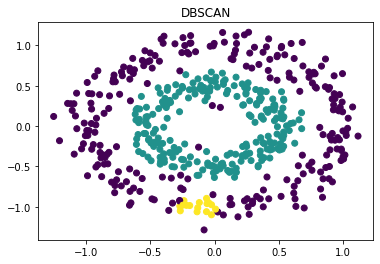

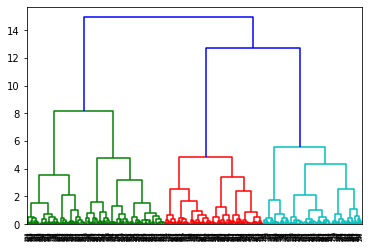

In [ ]:
Circles = datasets.make_circles(n_samples = 500, factor = 0.5, noise = 0.1)

X = np.asarray(Circles[0])
y = np.asarray(Circles[1])

plot_original_data(X, y)

model_agglomerative(X, 2)

model_DBSCAN(X, 0.155, 16)

plot_dendrogram(X)

##Blobs

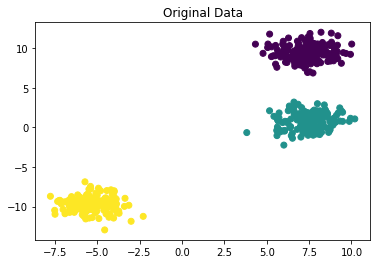

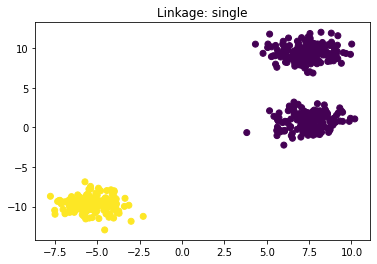

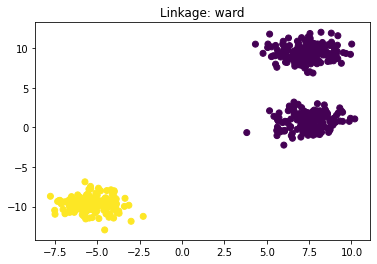

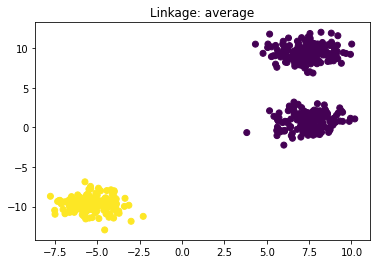

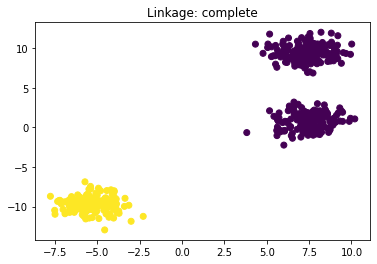

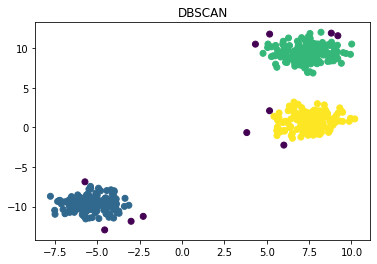

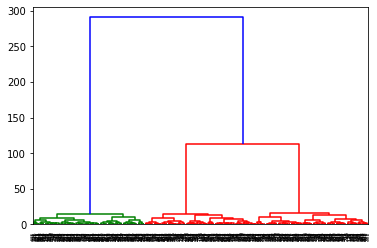

In [ ]:
Blobs = datasets.make_blobs(n_samples = 500, random_state = 8)

X = np.asarray(Blobs[0])
y = np.asarray(Blobs[1])

plot_original_data(X, y)

model_agglomerative(X, 2)

model_DBSCAN(X, 1, 15)

plot_dendrogram(X)